# __EXPLORATORY DATA ANALYSIS: CUSTOMER SHOPPING BEHAVIOUR AND PURCHASE PATTERNS__

## __INTRODUCTION__
In today's highly competitive retail scene, knowing customer behaviour is vital for generating sales, optimizing inventory, making product suggestions, and implementing targeted marketing strategies. In this project, a thorough dataset of 3,900 client transactions from an online fashion and accessory retailer is subjected to Exploratory Data Analysis (EDA) to uncover patterns, relationships, and trends pertaining to the shopping behaviour of customers. The analysis uses Python with libraries such as **pandas**, **matplotlib**, **seaborn**, and statistical methods to reveal both obvious trends and more subtle insights.

## __DATA DESCRIPTION__
The dataset records retail customers' comprehensive shopping behavior, concentrating on demographics, purchase patterns, preferences, and transaction-related variables. It gives a complete picture of how customers interact with items across multiple categories, seasons, and locations, as well as their buying habits, loyalty indications, and use of discounts or promotional offers. Below is a description of the various features of the dataset.

1.__Customer ID__: Unique identifier assigned to each customer.

2.__Age__: Age of the customer at the time of purchase.

3.__Gender__: Gender of the customer.

4.__Item Purchased__: Specific product purchased by the customer.

5.__Category__: Product category to which the purchased item belongs (e.g., Clothing, Footwear).

6.__Purchase Amount (USD)__: Monetary value of the transaction in US dollars.

7.__Location__: Geographic location (state) of the customer.

8.__Size__:Size of the purchased item.

9.__Colour__: Color variant of the purchased item.

10.__Season__: Season during which the purchase was made.

11.__Review Rating__: Customer’s rating of the purchased item.

12.__Subscription Status__: Indicates whether the customer is subscribed to a membership or service (Yes/No).

13.__Shipping Type__: Mode of shipping selected for the order.

14.__Discount Applied__: Indicates whether a discount was applied to the purchase (Yes/No).

15.__Promo Code Used__: Indicates whether a promotional code was used (Yes/No).

16.__Previous Purchases__: Number of purchases made by the customer prior to the current transaction.

17.__Payment Method__:Payment method used to complete the transaction.

18.__Frequency of Purchases__: How often purchases are made

**Dataset Source**: <a href="https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset?select=shopping_trends_updated.csv">shopping_trends_updated</a>.

## __MAIN OBJECTIVES__

1. **Understand who the customers are.**  
   (age distribution, gender balance, geographic spread, subscription behavior)

2. **Identify what they buy.**  
   (most popular items, categories, preferred sizes, and colours)

3. **Analyze when and how often they buy.**  
   (seasonal patterns, purchase frequency, repeat purchase behavior)

4. **Discover spending patterns.**  
   (How spending varies by gender, age group, location, and product category)  
     
5. **How customers make payments to Items**

6. **Identify relationships and trends in the dataset**













The primary purpose of data comprehension is to get broad insights into the data, which include the number of rows and columns, data values, data kinds, and missing values in the dataset.




## __IMPORTING THE REQUIRED LIBRARIES__

In [1]:
#Import the necessary libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')
import warnings
# Ignore all warning
warnings.filterwarnings('ignore',category=FutureWarning)

## __LOADING DATA AND UNDERTAKING BASIC INSPECTION__

In [2]:
# Load the dataset and check the first and last 5 rows 

df=pd.read_csv("shopping_trends_updated.csv")
print(df.head())
print(df.tail())

   Customer_ID  Age Gender Item_Purchased  Category  Purchase_Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review_Rating Subscription_Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping_Type Discount_Applied Promo_Code_Used  Previ

In [3]:
# Check for dataset information 

print(df.info()) # Provides information on each attribute in the columns of the data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer_ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item_Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase_Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review_Rating           3900 non-null   float64
 11  Subscription_Status     3900 non-null   object 
 12  Shipping_Type           3900 non-null   object 
 13  Discount_Applied        3900 non-null   object 
 14  Promo_Code_Used         3900 non-null   

From the above, the dataset is made up of 3900 rows and 18 columns or attributes comprising of 3 data types, namely, Floats,64bit-Integers, and Objects. Taking the data types into consideration, 1 attribute is of the Float category, 4 attributes are of the 64bit-Integer category, and 13 attributes are of the Objects category. There are no null values in each column.



In [4]:
# Checking for the number of unique values in the dataset

df.nunique()

Customer_ID               3900
Age                         53
Gender                       2
Item_Purchased              25
Category                     4
Purchase_Amount (USD)       81
Location                    50
Size                         4
Color                       25
Season                       4
Review_Rating               26
Subscription_Status          2
Shipping_Type                6
Discount_Applied             2
Promo_Code_Used              2
Previous_Purchases          50
Payment_Method               6
Frequency_of_Purchases       7
dtype: int64

In [5]:
# Checking for missing values

df.isnull().sum()

Customer_ID               0
Age                       0
Gender                    0
Item_Purchased            0
Category                  0
Purchase_Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review_Rating             0
Subscription_Status       0
Shipping_Type             0
Discount_Applied          0
Promo_Code_Used           0
Previous_Purchases        0
Payment_Method            0
Frequency_of_Purchases    0
dtype: int64

In [6]:
# Checking for duplicate values

df.duplicated().sum()

np.int64(0)

## __SUMMARY STATISTICS__

In [7]:
print("\nNumerical columns summary:")
print(df.describe())

print("\nCategorical columns value counts:")
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts().head(10))  # top 10 most frequent


Numerical columns summary:
       Customer_ID          Age  Purchase_Amount (USD)  Review_Rating  \
count  3900.000000  3900.000000            3900.000000    3900.000000   
mean   1950.500000    44.068462              59.764359       3.749949   
std    1125.977353    15.207589              23.685392       0.716223   
min       1.000000    18.000000              20.000000       2.500000   
25%     975.750000    31.000000              39.000000       3.100000   
50%    1950.500000    44.000000              60.000000       3.700000   
75%    2925.250000    57.000000              81.000000       4.400000   
max    3900.000000    70.000000             100.000000       5.000000   

       Previous_Purchases  
count         3900.000000  
mean            25.351538  
std             14.447125  
min              1.000000  
25%             13.000000  
50%             25.000000  
75%             38.000000  
max             50.000000  

Categorical columns value counts:

Gender:
Gender
Male      2

## 1. __WHO ARE THE CUSTOMERS?__

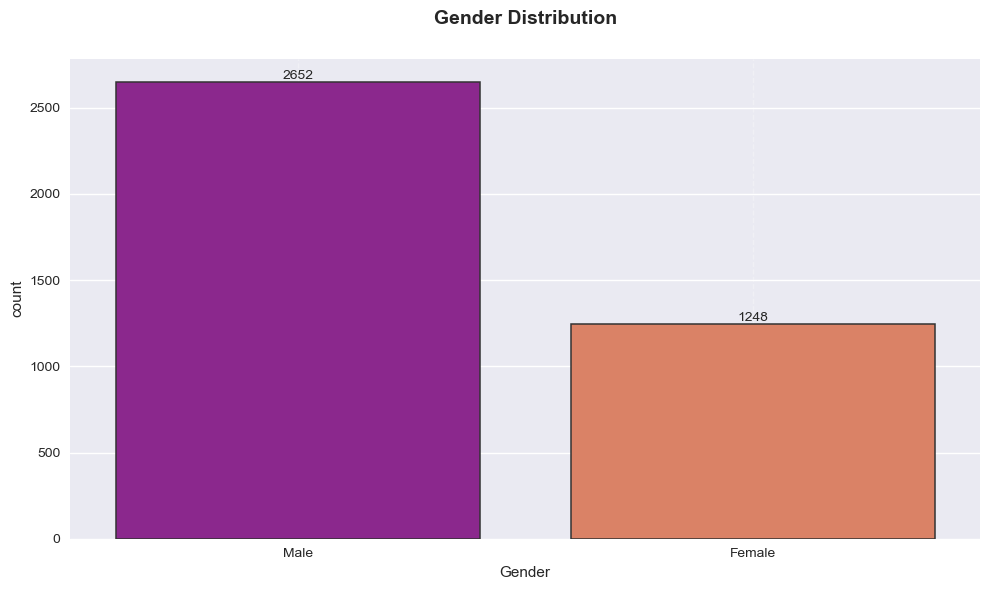

• Total customers: 3900


In [8]:
# Gender distribution
plt.figure(figsize=(10, 6))
ax=sns.countplot(data=df, x='Gender',palette='plasma',width=0.8,edgecolor='0.2',linewidth=1.1)
plt.title('Gender Distribution',fontsize=14,fontweight='bold', pad=25)
# Add data labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
    ha='center', va='bottom')

ax.grid(axis='x', linestyle='--', alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()

print(f"• Total customers: {len(df)}")

## __Insights__
1. There is a total of 3900 customers.

2. From the dataset, 2,652, representing 68%, are males, and 1,248, representing 32%, are females. This means the dataset skews towards the male gender.

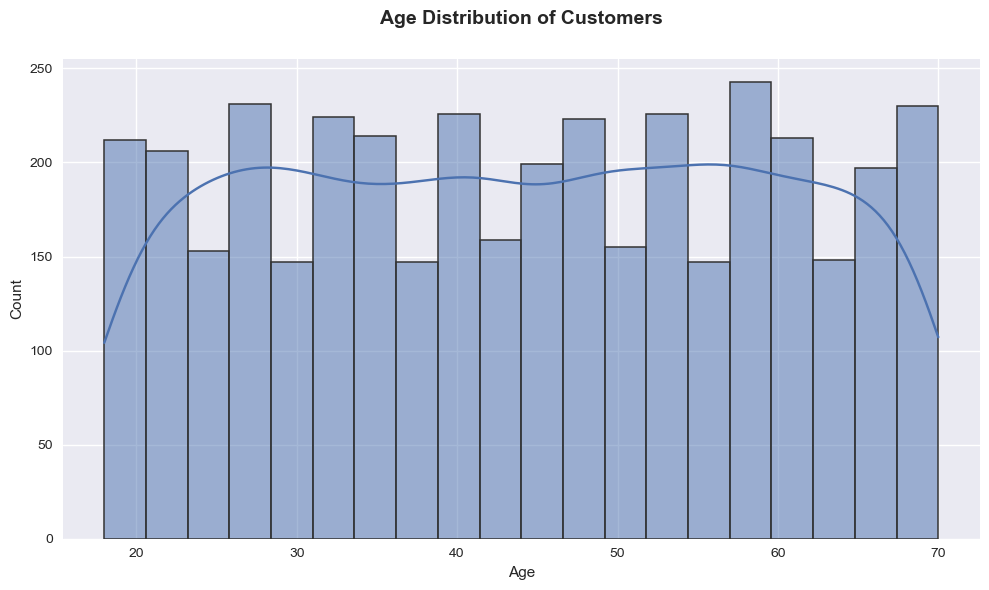

• Total customers: 3900


In [9]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=20, kde=True,edgecolor='0.2',linewidth=1.1)
plt.title('Age Distribution of Customers',fontsize=14,fontweight='bold', pad=25)
plt.xlabel('Age')
plt.ylabel('Count')
sns.despine()
plt.tight_layout()
plt.show()

print(f"• Total customers: {len(df)}")

## __Insight__
1. The customers in this dataset are primarily adults with a mean age of 44 years (ranging from 18 to 70). The age distribution is fairly even across   decades, with the median at 44.


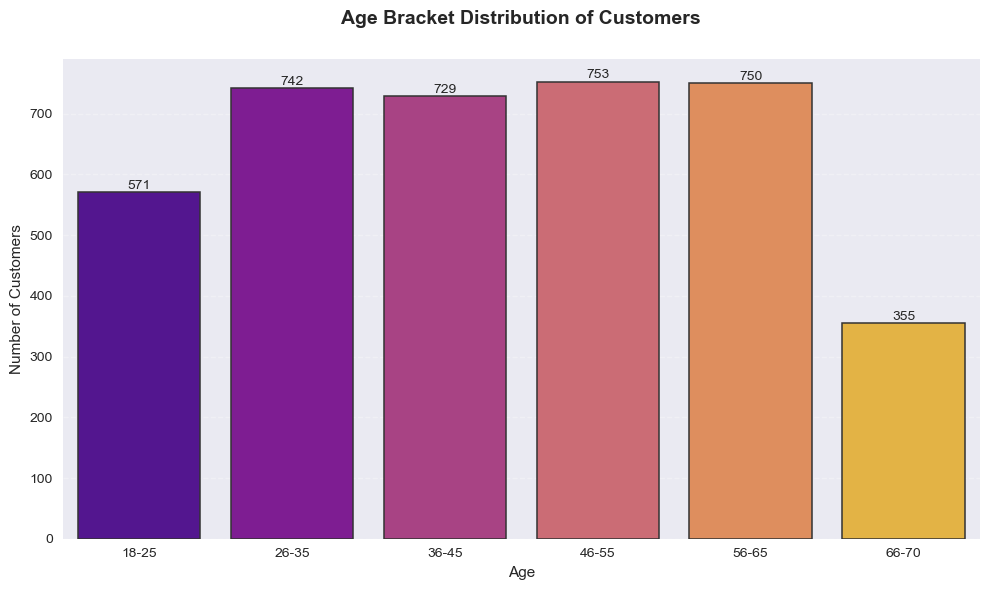

In [10]:
# Age Grouping of Customers
age_18_to_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age_26_to_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age_36_to_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age_46_to_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
age_56_to_65 = df.Age[(df.Age >= 56) & (df.Age <= 65)]
age_66_to_70 = df.Age[(df.Age >= 66) & (df.Age <= 70)]

# Assigning the categories to the axes
age_x = ['18-25','26-35','36-45','46-55','56-65','66-70']
age_y = [ len(age_18_to_25),len(age_26_to_35),len(age_36_to_45),len(age_46_to_55),len(age_56_to_65),len(age_66_to_70)]

# Visualizing the number of customers with respect to the Age bracket.
plt.figure(figsize=(10,6))
ax = sns.barplot(x=age_x, y=age_y,palette='plasma',edgecolor='0.2',linewidth=1.1)
plt.title('Age Bracket Distribution of Customers', fontsize=14, fontweight='bold', pad=25)
plt.xlabel('Age')
plt.ylabel('Number of Customers')

for i, value in enumerate(age_y):
    plt.text(i, value + 0.2, str(value), ha='center', va='bottom')

ax.grid(axis='y', linestyle='--', alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()



## __Insights__
1. The age distribution can be classified into the following categories with respect to the number of customers:

   * 18-25 = 571 customers

   * 26-35 = 742 customers

   * 36-45 = 729 customers

   * 46-55 = 753 customers

   * 56-65 = 750 customers

   * 66-70 = 355 customers
   
Hence, there is a fair distribution in the number of customers amongst age categories: 26-35, 36-45, 46-55, and 56-65, even though the age category 46-55 recorded the highest number of customers. The older category of 66-70, possibly made up of retirees, has the least number of customers.


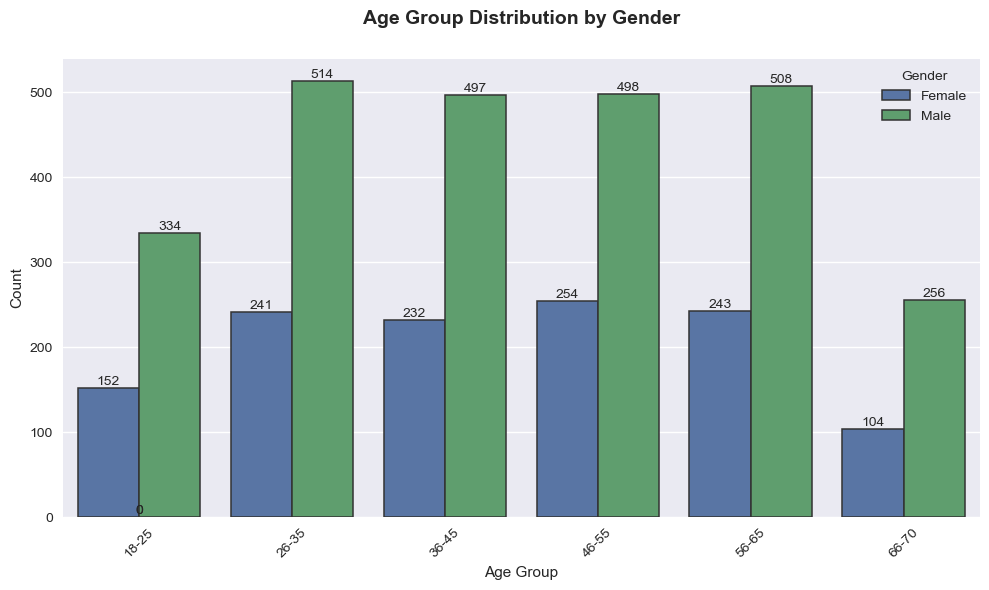

In [11]:
# Distribution of Ages by Gender
bins = [18, 25, 35, 45, 55, 65, 70]
age_x= ['18-25','26-35','36-45','46-55','56-65','66-70']

df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=age_x, right=False)

# Group by gender and age group
grouped_data = df.groupby(['Gender', 'Age_Group']).size().reset_index(name='Count')

# Clustered barplot 
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(data=grouped_data, x='Age_Group', y='Count', hue='Gender',edgecolor='0.2',linewidth=1.1)
plt.title('Age Group Distribution by Gender',fontsize=14,fontweight='bold', pad=25)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.xticks(rotation=45)

#Data Labels
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom')
plt.tight_layout()
plt.show()

## __Insights__
1. Gender distribution by age categories also provides the following insights,
* 18-25:male=398, female=173
* 26-35: male=500, female=242
* 36-45:male=486,female=243
* 46-55:male=507,female=246
* 56-65:male=508,female=243
* 66-70:male=256,female=104


Location
Montana       96
California    95
Idaho         93
Illinois      92
Alabama       89
Minnesota     88
Nevada        87
Nebraska      87
New York      87
Delaware      86
Name: Customer_ID, dtype: int64


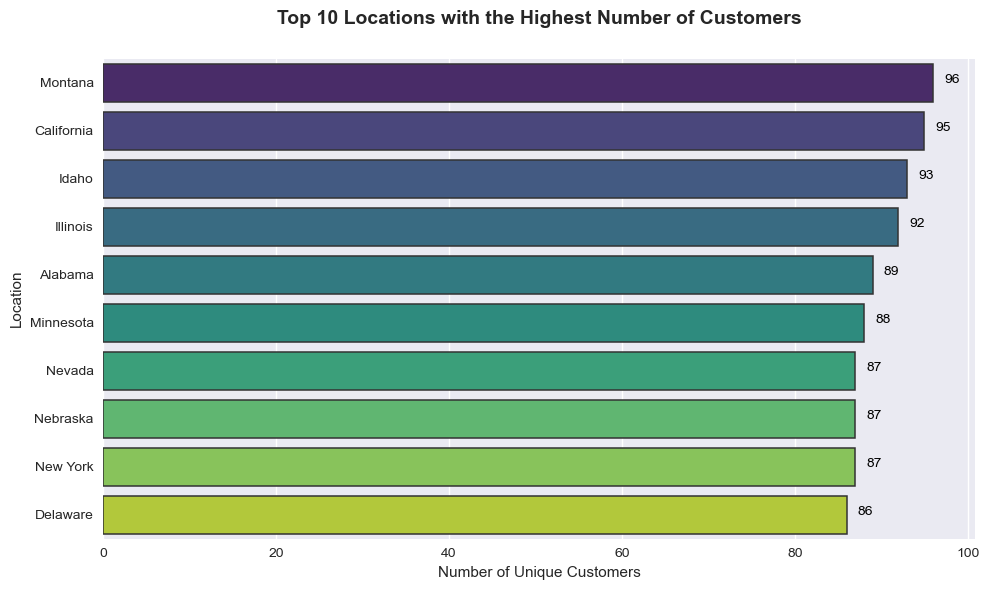

In [12]:
# Count unique customers per location
top_10_locations = (df.groupby('Location')['Customer_ID'].nunique().sort_values(ascending=False).head(10))
print(top_10_locations)
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_10_locations.values,y=top_10_locations.index,palette='viridis',width=0.8,edgecolor='0.2',linewidth=1.1)

plt.title("Top 10 Locations with the Highest Number of Customers",fontsize=14,fontweight='bold', pad=25)
plt.xlabel("Number of Unique Customers")
plt.ylabel("Location")

# Data Labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}',(p.get_width(), p.get_y() + p.get_height()/2),ha='left',  
        xytext=(8, 0),textcoords='offset points',fontsize=10,fontweight='medium',color='black')

plt.tight_layout()
plt.show()

## __Insight__
1. Customers are spread across various locations, with the top 10 states representing a balanced distribution:
* Montana = 96
* California = 95
* Idaho = 93
* Illinois = 92
* Alabama = 89
* Minnesota = 88
* New York = 87
* Nevada = 87
* Nebraska = 87
* Delaware = 86


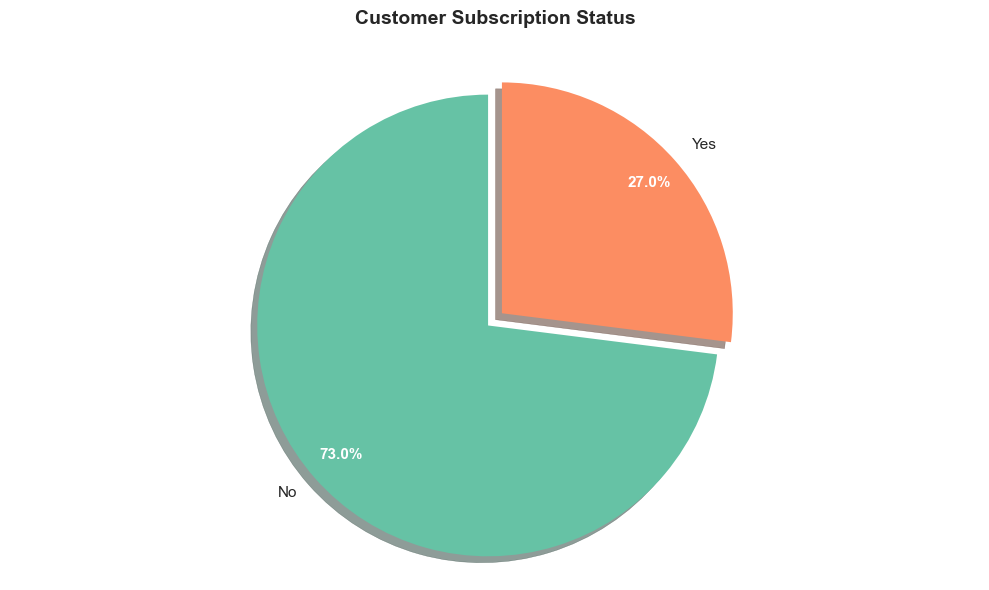

In [13]:
# Pie Chart to Show subscription status of customers
counts = df['Subscription_Status'].value_counts()
labels = counts.index
percentages = counts / counts.sum() * 100

# Colors from a seaborn palette
colors = sns.color_palette("Set2", len(labels))

plt.figure(figsize=(10, 6))

wedges, texts, autotexts = plt.pie(counts,labels=labels,autopct='%1.1f%%',startangle=90,
    colors=colors,shadow=True,explode=[0.04] * len(labels),pctdistance=0.85,textprops={'fontsize': 11})

# making percentage text bolder / more readable
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.title('Customer Subscription Status', fontsize=14,fontweight='bold', pad=25)
plt.axis('equal')
sns.despine()
plt.tight_layout()
plt.show()

### __Insight__
1. Subscription status indicates that most customers, about 73% (2,847), are not subscribed, whereas 27% (1,053) have an active subscription. 

## 2. __WHAT DO THEY BUY?__

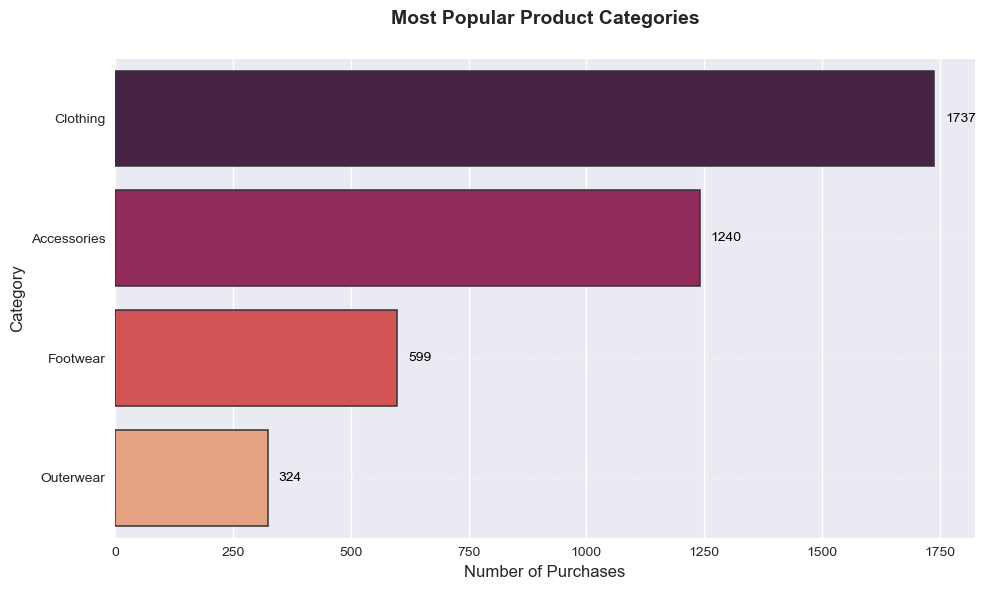

In [14]:
# Top Product Categories 
plt.figure(figsize=(10, 6))

# Creating horizontal count plot
bar_plot = sns.countplot(data=df,y='Category',order=df['Category'].value_counts().index,palette='rocket',
                         edgecolor='0.2',linewidth=1.1)
plt.title('Most Popular Product Categories',fontsize=14,fontweight='bold', pad=25)
plt.xlabel('Number of Purchases', fontsize=12)
plt.ylabel('Category', fontsize=12)

# Data Labels
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_width())}',(p.get_width(), p.get_y() + p.get_height()/2),ha='left',                      
    va='center',xytext=(8, 0),textcoords='offset points',fontsize=10,color='black')

plt.grid(axis='y', linestyle='--', alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()

## __Insight__
1. The majority of purchases fall into the Clothing category (1,737), followed by Accessories (1,240). Footwear and outerwear are less frequent.
Below is a breakdown of the number of purchases per category:
* Clothing = 1,737
* Accessories = 1,240
* Footwear = 599
* Outerwear = 324

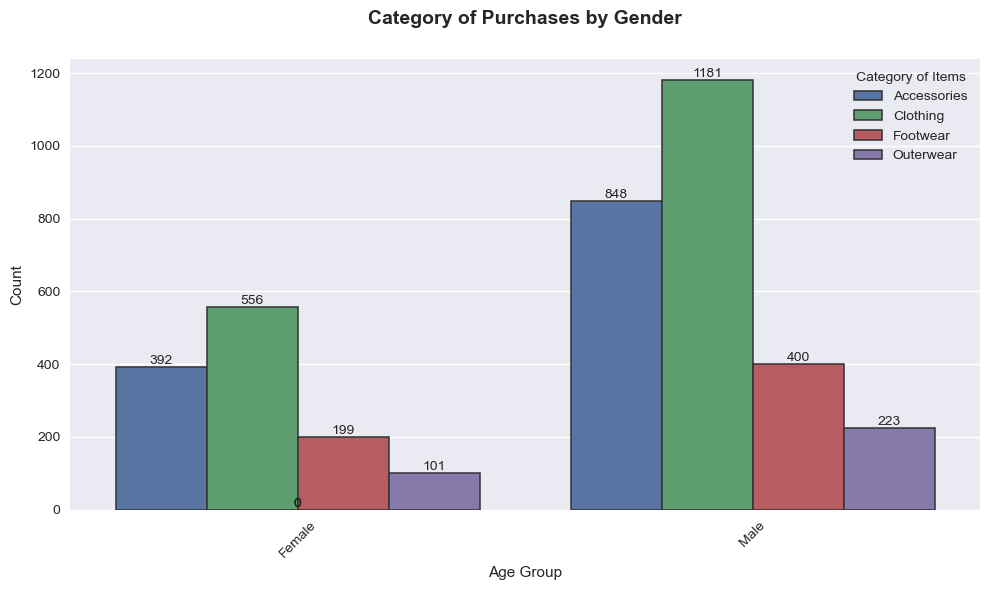

In [15]:
# Category of Purchases by Gender

grouped_data = df.groupby(['Category', 'Gender']).size().reset_index(name='count')

# Create a clustered barplot using seaborn
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(data=grouped_data, x='Gender', y='count', hue='Category',edgecolor='0.2',linewidth=1.1)

# Add data labels on top of the bars
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom')

plt.title('Category of Purchases by Gender',fontsize=14,fontweight='bold', pad=25)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Category of Items')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## __Insight__
1. With regard to the category of items being purchased by the different genders, it is evident that clothing (male=1181, female=556) is predominantly the most preferred, with outerwear being the least preferred. The breakdown is shown below.
* Male: Accessories = 848, Clothing = 1181, Footwear = 400, Outerwear = 223
* Female: Accessories = 392, Clothing = 556, Footwear = 199, Outerwear = 101

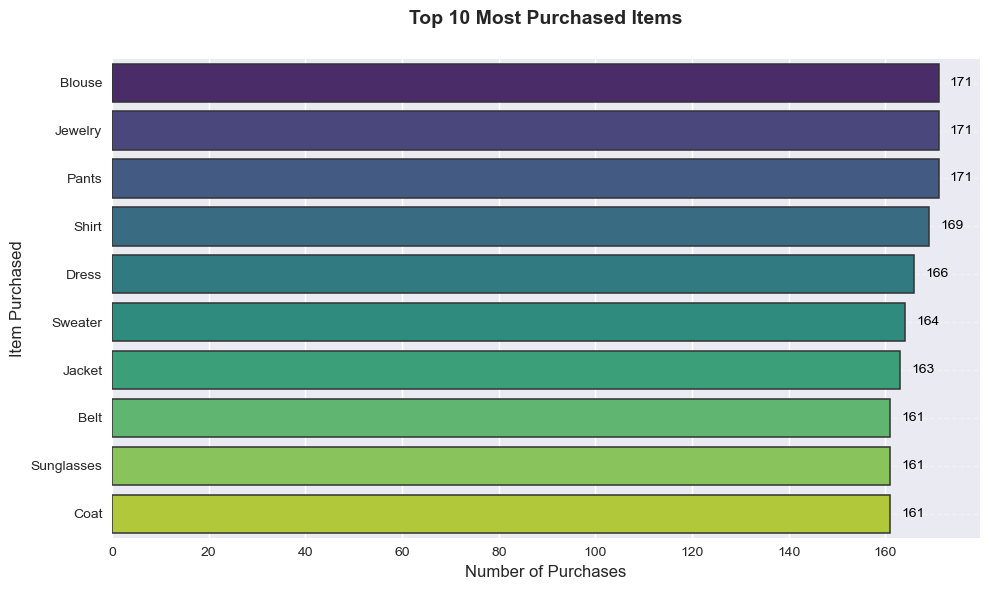

In [16]:
# Top 10 most purchased Items
top_10_items = df['Item_Purchased'].value_counts().nlargest(10).index

# Optional: filter the dataframe (not strictly necessary for countplot, but good practice)
df_top10 = df[df['Item_Purchased'].isin(top_10_items)]

# Create figure
plt.figure(figsize=(10, 6))

# Horizontal countplot – ordered from most to least frequent
ax = sns.countplot(data=df,y='Item_Purchased',order=top_10_items,palette='viridis',edgecolor='0.2',linewidth=1.1)

# Title and labels
plt.title("Top 10 Most Purchased Items",fontsize=14,fontweight='bold', pad=25)
plt.xlabel("Number of Purchases", fontsize=12)
plt.ylabel("Item Purchased", fontsize=12)

#Data Labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}',(p.get_width(), p.get_y() + p.get_height()/2),ha='left',va='center',
        xytext=(8, 0),textcoords='offset points',fontsize=10,fontweight='medium',color='black')

plt.grid(axis='y', linestyle='--', alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()

## __Insight__
1. Customers purchase a variety of items across categories, with blouses, pants, and jewelry being the most common, with each having 171 purchases. Less common items purchased include jeans with 124 purchases. The top 10 items purchased include,

   * Blouse = 171                             
   * Pants = 171
   * Jewelry = 171
   * Shirt = 169
   * Dress = 166
   * Sweater = 164
   * Jacket = 163  
   * Coat = 161
   * Sunglasses = 161
   * Belt = 161
   * Sandals = 160


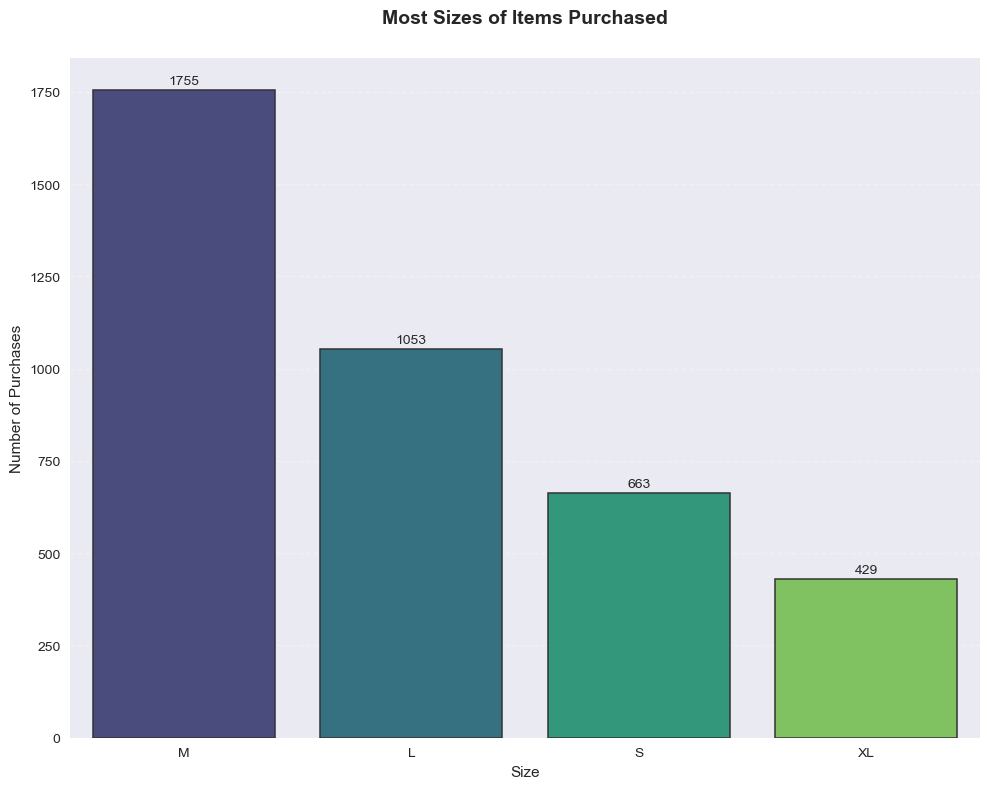

In [17]:
# Most  purchased sizes

plt.figure(figsize=(10, 8))
# Order of the Chart
size_order = df['Size'].value_counts().sort_values(ascending=False).index

ax = sns.countplot(data=df,x='Size',order=size_order,palette='viridis',edgecolor='0.2',linewidth=1.1)
plt.title('Most Sizes of Items Purchased',fontsize=14,fontweight='bold', pad=25)
plt.xlabel('Size',)
plt.ylabel('Number of Purchases')

# Data Labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',(p.get_x() + p.get_width()/2, p.get_height() + 8),ha='center',
                va='bottom',fontsize=10,fontweight='medium')

plt.grid(axis='y', linestyle='--', alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()

## __Insight__
1. Medium (M) sizes dominate (1,755), with Large (L) also popular. Smaller and extra-large sizes are less common.
  
  * Medium (M) = 1,755
  
  * Large (L) = 1,053
  
  * Small (S) = 663
  
  * Extra Large (XL) = 429

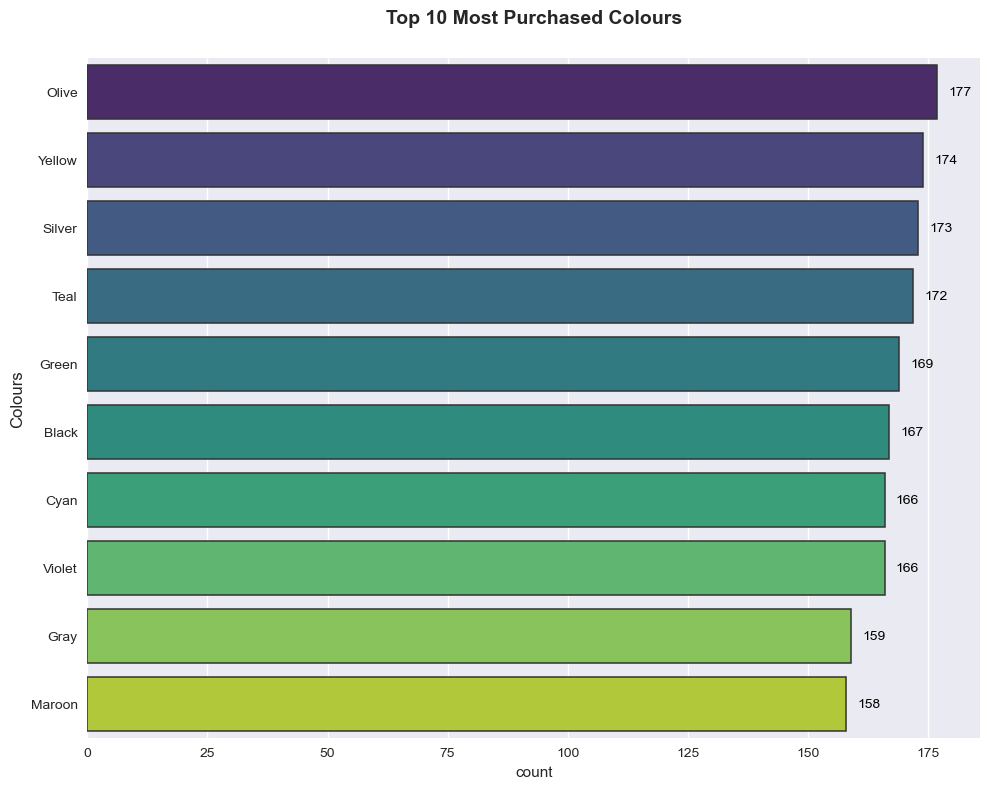

In [18]:
# Top 10 most Purchased Colours
top_10_colours = df['Color'].value_counts().nlargest(10).index

#filtering the dataframe
df_top10 = df[df['Color'].isin(top_10_items)]

# Create figure
plt.figure(figsize=(10, 8))
ax = sns.countplot(data=df,y='Color',order=top_10_colours,palette='viridis',edgecolor='0.2',linewidth=1.1)
plt.title("Top 10 Most Purchased Colours",fontsize=14,fontweight='bold', pad=25)
plt.ylabel("Colours", fontsize=12)

#Data Labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}',(p.get_width(), p.get_y() + p.get_height()/2),ha='left',va='center',
        xytext=(8, 0),textcoords='offset points',fontsize=10,fontweight='medium',color='black')

plt.tight_layout()
plt.show()

## __Insight__

1. Colours show a preference for neutral and earthy tones like Olive (177) and Yellow (174), with brighter colors like Gold (138) at the lower end. The top 10 preferences are,

  * Olive = 177

  * Yellow = 174
  
  * Silver = 173
  
  * Teal = 172
  
  * Green = 169
  
  * Black = 167
  
  * Cyan = 166
  
  * Violet = 166
  
  * Gray = 159
  
  * Maroon = 158


## 3. __WHEN AND HOW OFTEN DO THEY BUY?__

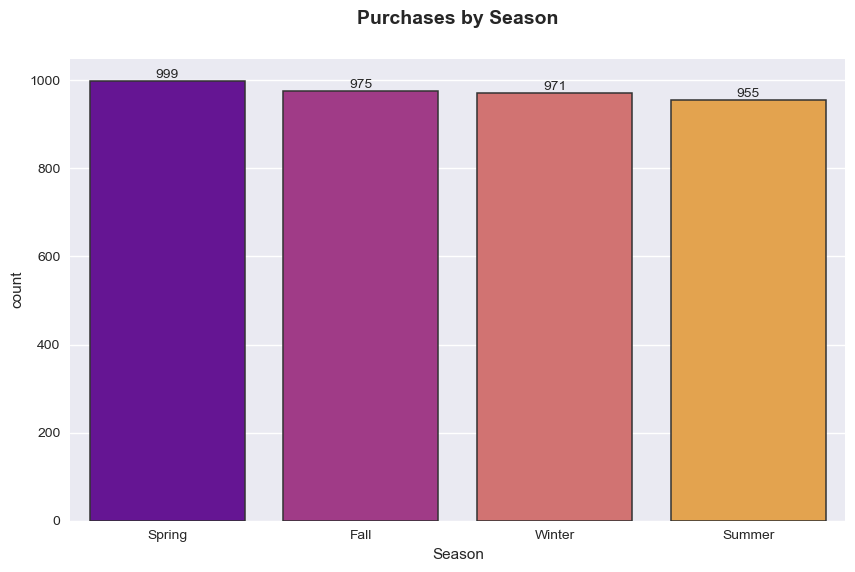

In [19]:
# Purchases by Season
plt.figure(figsize=(10, 6))
season_order = df['Season'].value_counts().sort_values(ascending=False).index
ax=sns.countplot(data=df, x='Season', order=season_order,palette='plasma',edgecolor='0.2',linewidth=1.1)
plt.title('Purchases by Season',fontsize=14,fontweight='bold', pad=25)

# Add data labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',(p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')
plt.show()

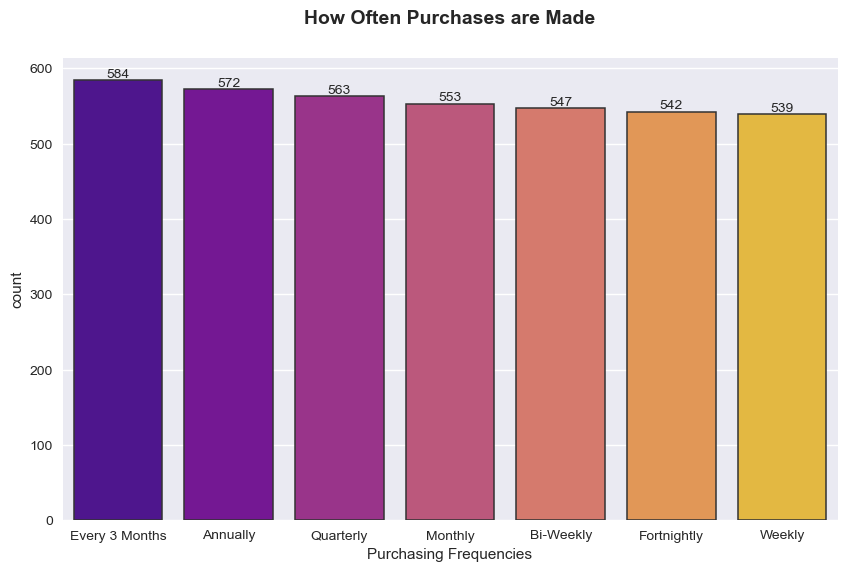

In [20]:
# Frequency of Purchase
plt.figure(figsize=(10, 6))
Frequency_order = df['Frequency_of_Purchases'].value_counts().sort_values(ascending=False).index
ax=sns.countplot(data=df, x='Frequency_of_Purchases',order=Frequency_order,palette='plasma',edgecolor='0.2',linewidth=1.1)
plt.xlabel('Purchasing Frequencies')
plt.title('How Often Purchases are Made',fontsize=14,fontweight='bold', pad=25)

# Data Labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',(p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')
plt.show()


## __Insights__
1. Purchases are fairly evenly distributed across seasons, with spring seeing the highest volume of 999 and summer the lowest at 955. The second highest purchase volume of 975 was made in the fall season, and the third highest purchase of 971 came in the winter season.
2. Purchase frequency is also balanced, with "Every 3 Months" being the most common (584). Weekly purchases are slightly less frequent (539).
Here is a breakdown of the frequency of purchases:

   * Every 3 Months = 584

   * Annually = 572

   * Quarterly = 563

   * Monthly = 553

   * Bi-Weekly = 547

   * Fortnightly = 542

   * Weekly = 539

## 4. __SPENDING PATTERNS BY GENDER,AGE,LOCATION, AND CATEGORY__

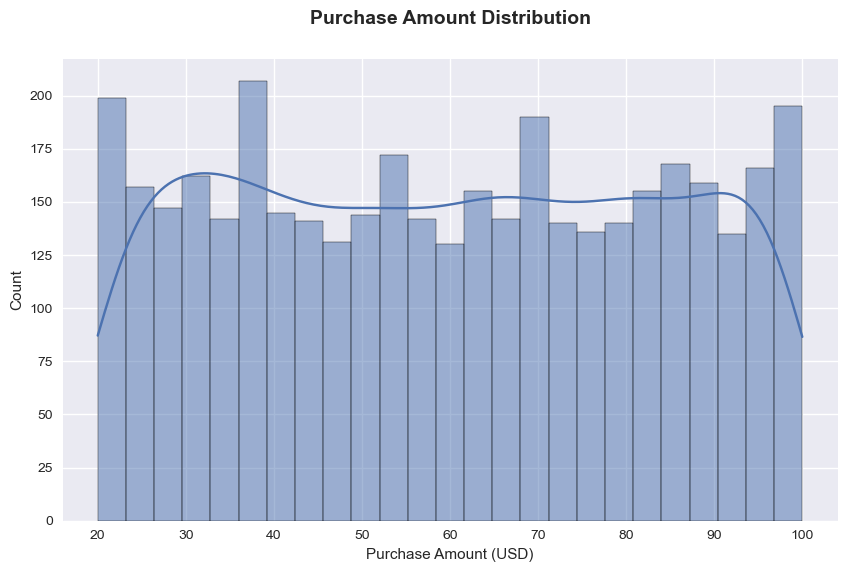


*** Overall Average Purchase
59.76435897435898


In [21]:
# Overall Spending distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Purchase_Amount (USD)', bins=25, kde=True)
plt.title('Purchase Amount Distribution',fontsize=14,fontweight='bold', pad=25)
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Count')
plt.show()

purchase_col = 'Purchase_Amount (USD)'
print("\n*** Overall Average Purchase")
print(df[purchase_col].mean())


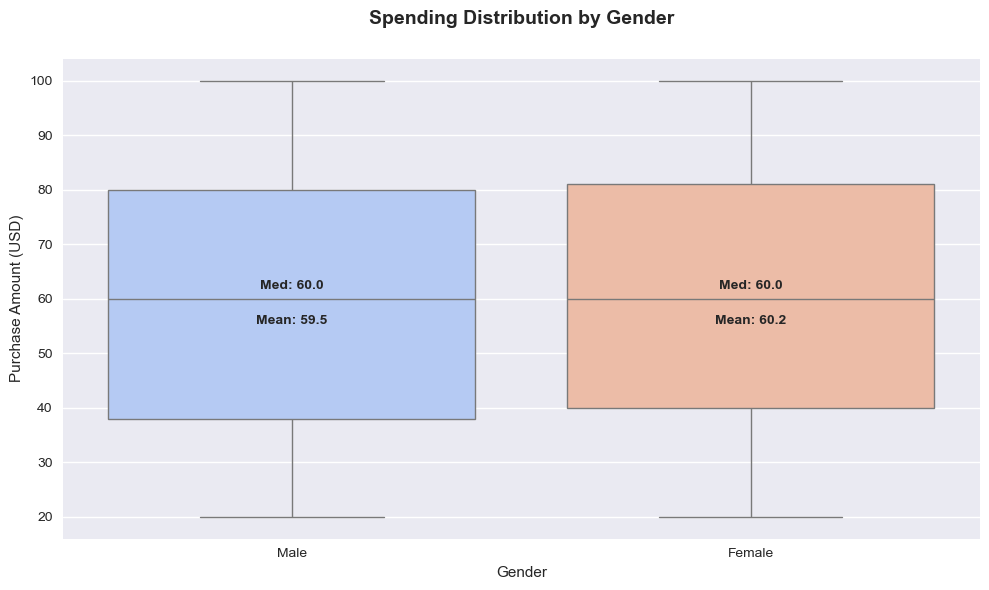

In [22]:
# Spending Pattern by Gender
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x='Gender', y='Purchase_Amount (USD)', palette='coolwarm')

plt.title('Spending Distribution by Gender',fontsize=14,fontweight='bold', pad=25)
plt.xlabel('Gender')
plt.ylabel('Purchase Amount (USD)')

# median and mean
for i, gender in enumerate(ax.get_xticklabels()):
    data = df[df['Gender'] == gender.get_text()]['Purchase_Amount (USD)']
    med = data.median()
    mn = data.mean()
    
    ax.text(i, med + 1.2, f'Med: {med:.1f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
    ax.text(i, med - 3,   f'Mean: {mn:.1f}', ha='center', va='top', fontsize=10,fontweight='bold')

plt.tight_layout()
plt.show()

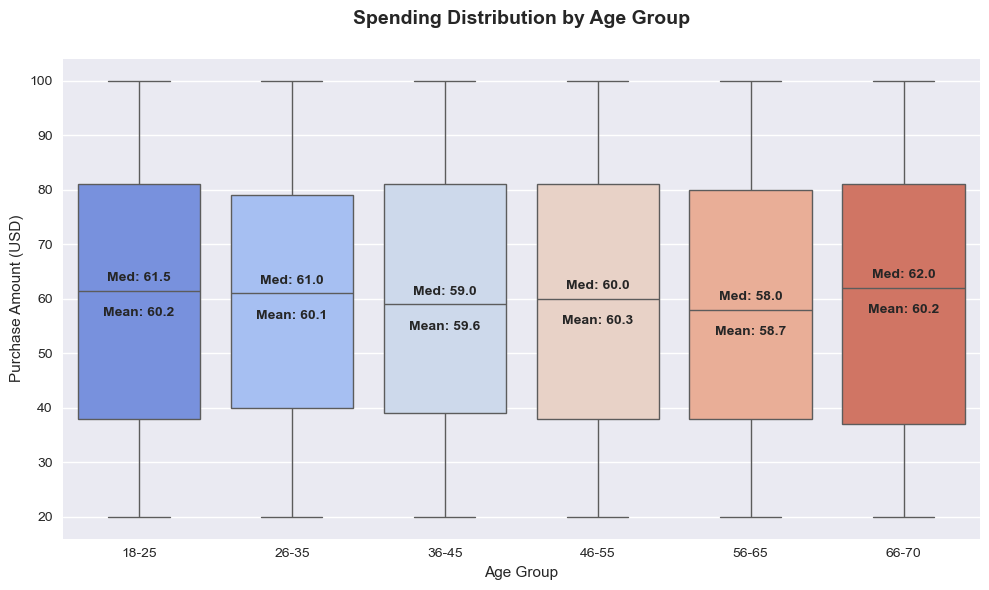

In [23]:
# Spending Pattern by Age Groupings

plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x='Age_Group', y='Purchase_Amount (USD)', palette='coolwarm')

plt.title('Spending Distribution by Age Group',fontsize=14,fontweight='bold', pad=25)
plt.xlabel('Age Group')
plt.ylabel('Purchase Amount (USD)')

for i, label in enumerate(ax.get_xticklabels()):
    group = label.get_text()
    med = df[df['Age_Group'] == group]['Purchase_Amount (USD)'].median()
    mn=df[df['Age_Group'] == group]['Purchase_Amount (USD)'].mean()
    ax.text(i, med + 1.2, f'Med: {med:.1f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
    ax.text(i, med - 3,   f'Mean: {mn:.1f}', ha='center', va='top', fontsize=10,fontweight='bold')

plt.tight_layout()
plt.show()

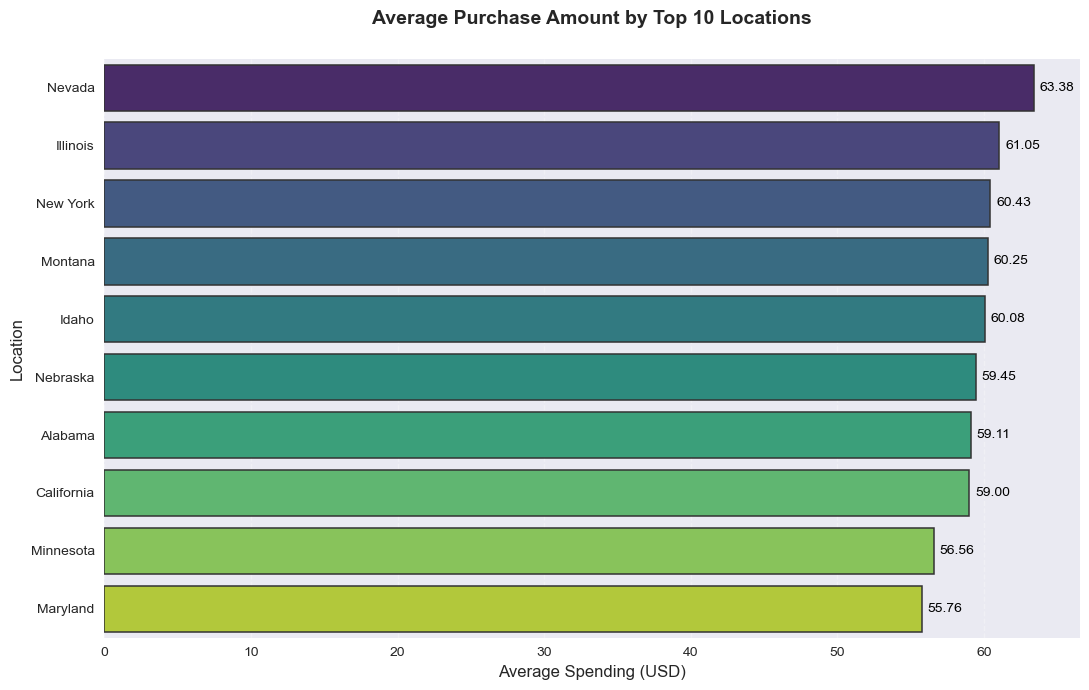

In [24]:
# Get top 10 locations by number of purchases
top_locations = df['Location'].value_counts().head(10).index

# Calculate mean purchase amount for these locations, sorted ascending
mean_spending = (df[df['Location'].isin(top_locations)].groupby('Location')['Purchase_Amount (USD)'].mean().sort_values(ascending=False))

# Create figure and axis
plt.figure(figsize=(11, 7))

# Horizontal bar plot with Seaborn
ax = sns.barplot(x=mean_spending.values,y=mean_spending.index,palette='viridis',edgecolor='0.2',linewidth=1.1)

# Title and labels
plt.title("Average Purchase Amount by Top 10 Locations",fontsize=14,fontweight='bold', pad=25)
plt.xlabel("Average Spending (USD)", fontsize=12)
plt.ylabel("Location", fontsize=12)

# Data labels 
for i, value in enumerate(mean_spending.values):
    ax.text(value + 0.4,i,f'{value:.2f}',va='center',fontsize=10,fontweight='medium',color='black')

ax.grid(axis='x', linestyle='--', alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()

## __Insights__
1. In terms of purchases by gender, there are not many difference, with females spending an average of $\$60.25$  and males spending an average of
$\$59.54$.

2. Concerning the various age groups, spending is consistent across groups, with the highest in the 18-25 ($\$60.74$) and 46-55 ($\$60.74$) age groups and the lowest in the 66-70 ($\$58.88$) age group.

3. The top average spenders are from Alaska ($\$67.60$), Pennsylvania ($\$66.57$), and Arizona ($\$66.55$).

4. By the category of purchases, clothing ($\$60.03$) and footwear ($\$60.26$) have the highest averages, while outerwear ($\$57.17$) is lowest.
   

## 5. __WHAT IS THE PREFERRED MODE OF PAYMENT BY SHOPPERS?__

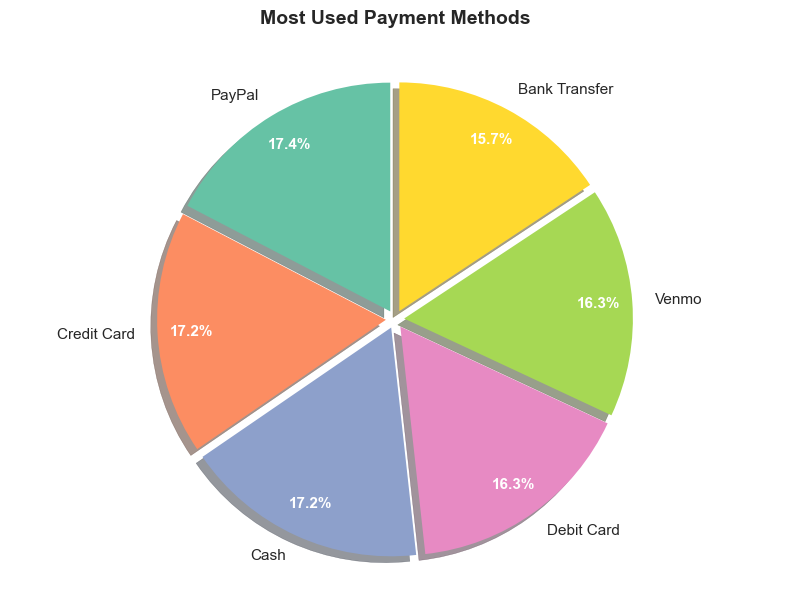

In [25]:
# Most used mode of payment by shopper

counts = df['Payment_Method'].value_counts()
labels = counts.index
percentages = counts / counts.sum() * 100

# Colors from a seaborn palette
colors = sns.color_palette("Set2", len(labels))

plt.figure(figsize=(8, 6))

wedges, texts, autotexts = plt.pie(counts,labels=labels,autopct='%1.1f%%',startangle=90,
    colors=colors,shadow=True,explode=[0.04] * len(labels),pctdistance=0.85,textprops={'fontsize': 11})

# For bolder text bolder
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.title('Most Used Payment Methods',fontsize=14,fontweight='bold', pad=25)
plt.axis('equal')
plt.tight_layout()
plt.show()


## __Insight__
1. Payments are evenly spread across methods, with PayPal (17.4%) and Credit Card (17.2%) being the most common, followed by Cash (17.2%), Debit Card (16.3%), Venmo (16.3%), and Bank Transfer (15.7%).

## 6. __WHAT RELATIONSHIPS AND TRENDS CAN BE DERIVED FROM THE DATA?__

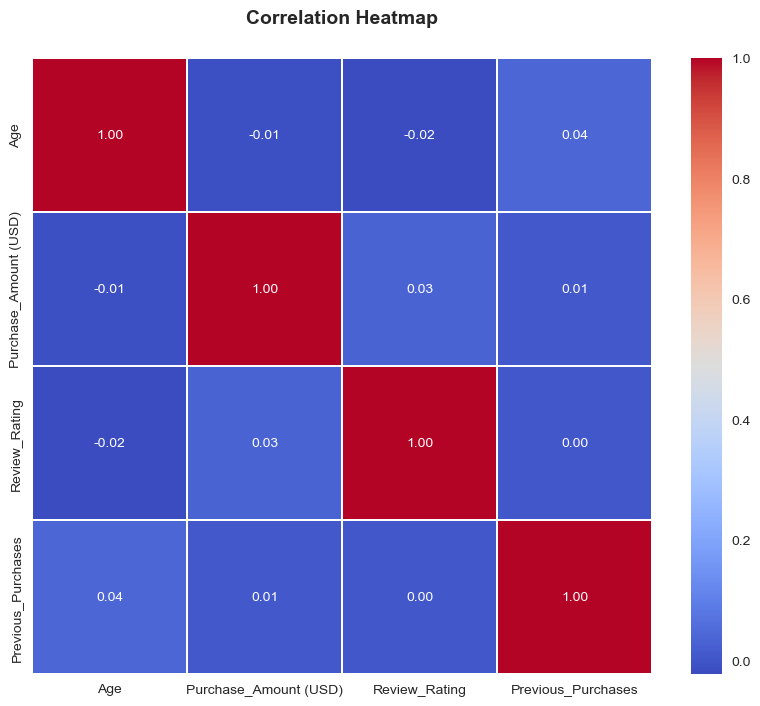

In [26]:
# Correlations

plt.figure(figsize=(10, 8))

# Select only numerical columns and exclude Customer ID
numerical_df = df.select_dtypes(include=['number']).drop(columns=['Customer_ID'])

# Compute correlation matrix
correlation = numerical_df.corr()

# Plot heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f',edgecolor='0.2',linewidth=1.1)
plt.title('Correlation Heatmap',fontsize=14,fontweight='bold', pad=25)
plt.show()


## __Insights__
1. Correlations are weak overall.
2. Age slightly positively correlates with previous purchases (0.04), but negatively with review ratings (-0.02).
3. Purchase amount has minor positive links to review ratings (0.03).

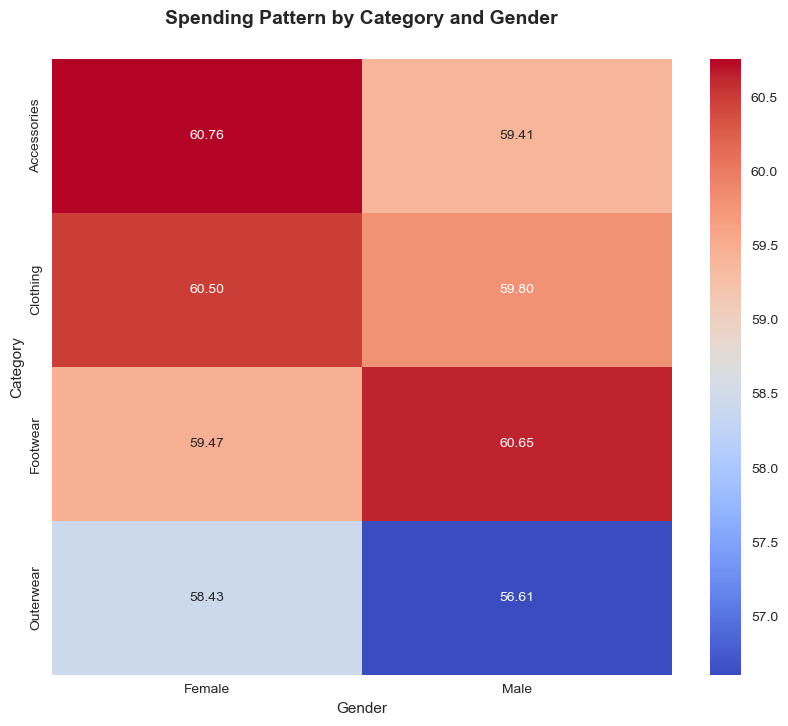

In [27]:
# Spending Pattern: Category vs. Gender
pivot = df.pivot_table(values='Purchase_Amount (USD)',index='Category',columns='Gender',aggfunc='mean')

plt.figure(figsize=(10, 8))

sns.heatmap(pivot, annot=True,fmt='.2f', cmap='coolwarm')
plt.title("Spending Pattern by Category and Gender",fontsize=14,fontweight='bold', pad=25)
plt.show()


## __Insights__
1. Women tend to spend more on Accessories, Clothing, and Outerwear.

2. With Men, their spending is more focused on Footwear.

3. The largest gender spending difference appears in Outerwear (women clearly prefer/need it more) and Accessories (also female-leaning).

4. Clothing shows the smallest gender spending gap, where both genders spend quite similarly here (high values for both).

5. With respect to the overall spending level,Accessories and Clothing are the highest-spending categories for both genders (approximately in the $\$59$–$\$61$ range), while Outerwear is consistently the lowest (approximately in the $\$56$–$\$58$ range).


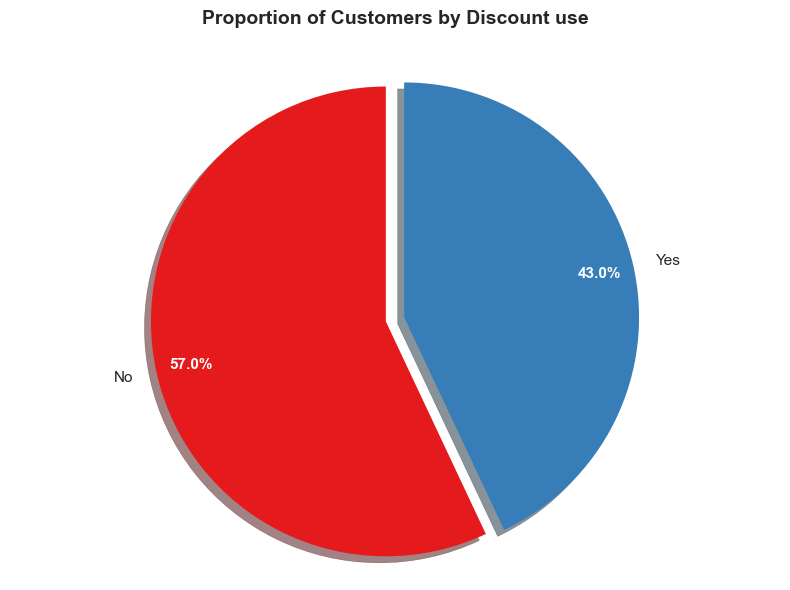

In [28]:
# Proportion of Customers by Discount Applied

counts = df['Discount_Applied'].value_counts()
labels = counts.index
percentages = counts/counts.sum() * 100

# Colour palette
colors = sns.color_palette("Set1", len(labels))

plt.figure(figsize=(8, 6))

wedges, texts, autotexts = plt.pie(counts,labels=labels,autopct='%1.1f%%',startangle=90,
    colors=colors,shadow=True,explode=[0.04] * len(labels),pctdistance=0.85,textprops={'fontsize': 11})

# For bolder texts
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.title('Proportion of Customers by Discount use',fontsize=14,fontweight='bold', pad=25)
plt.axis('equal')
plt.tight_layout()
plt.show()


## __Insights__
1. Over half the customer base, 57% to be precise, rarely use discounts, meaning they purchase items at full price. Hence, the majority do not use discounts.
2. 43% of customers make use of discounts offered, which suggest that a sizeable number, though not dominant, of the customer base have a discount-sensitive behaviour.


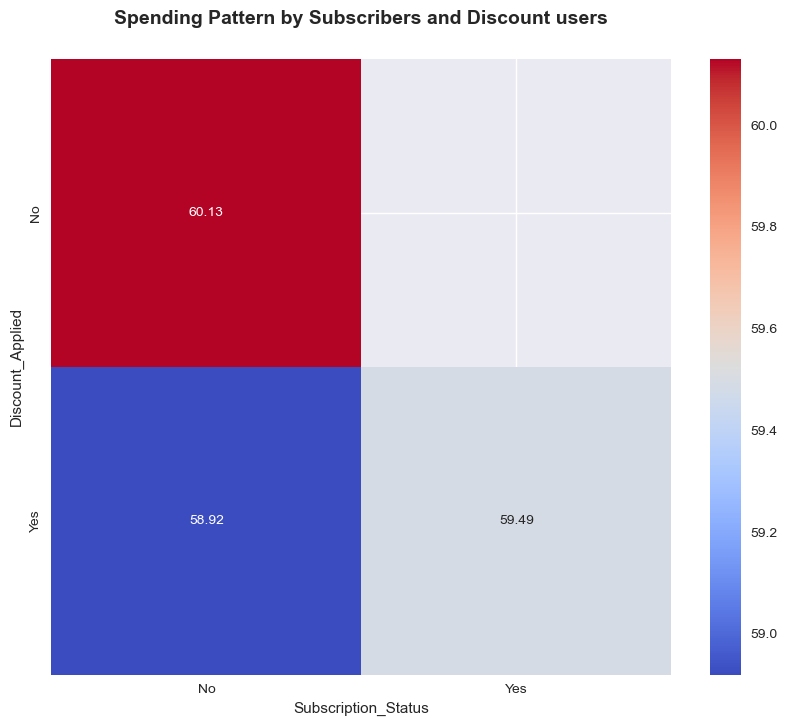

In [29]:
# Spending Pattern: Subscription vs Discount
pivot = df.pivot_table(values='Purchase_Amount (USD)',index='Discount_Applied',columns='Subscription_Status',aggfunc='mean')
plt.figure(figsize=(10, 8))
sns.heatmap(pivot, annot=True,fmt='.2f', cmap='coolwarm')
plt.title("Spending Pattern by Subscribers and Discount users",fontsize=14,fontweight='bold', pad=25)
plt.show()

## __Insights__
1. Highest spending comes from customers who neither subscribe nor use discounts. On average such customers pay as much $\$60.13$.
2. Customers who are discount users pay less regardless of their subscription status. Non-subscribers who are discount users pay an average of $\$58.92$, and subscribers who are discount users pay  $\$59.49$.
3. Subscription status has a smaller or mixed effect in that, amongst discount users, subscribers spend slightly more than non-subscribers, with a marginal difference of $\$0.57$.
4. There are no subscribers who did not make use of a discount.


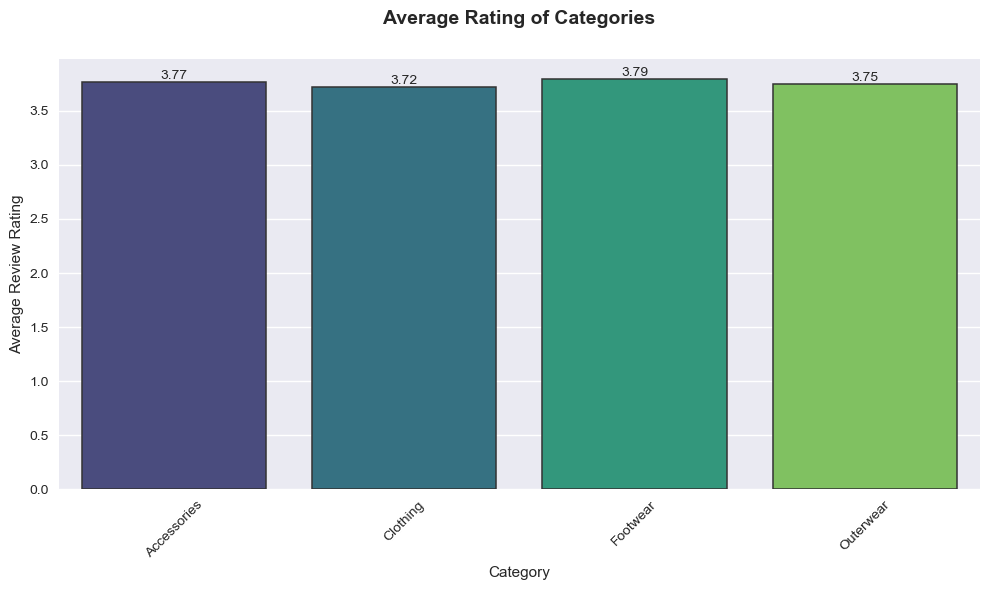

• Average review rating: 3.75/5


In [30]:
# Average ratings by Category
pivot = pd.pivot_table(data=df,values='Review_Rating',index='Category',aggfunc='mean').reset_index()

plt.figure(figsize=(10,6))
ax = sns.barplot(data=pivot,x='Category',y='Review_Rating',palette='viridis',edgecolor='0.2',linewidth=1.1)
plt.title('Average Rating of Categories', fontsize=14, fontweight='bold', pad=25)
plt.xlabel('Category')
plt.ylabel('Average Review Rating')
plt.xticks(rotation=45)

# Data Labels (keep decimals)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',(p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',va='bottom')
plt.tight_layout()
plt.show()

print(f"• Average review rating: {df['Review_Rating'].mean():.2f}/5")

## __Insights__
1. The ratings are all high, which indicates consistent satisfaction from customers. The average ratings range from 3.72 to 3.79 in all categories, which is a signal that all customers are generally quite happy with the products across board.
2. The average ratings range from 3.72 to 3.79 and are very close, which indicates that no single category stands out as being loved or disliked much more than the others.
3. Footwear edges out as the best-rated category (3.79), which is the most (on average), and accessories follow very closely (3.77).
4. Clothing receives the lowest average rating (3.72), though it is still a perfectly respectable score, and outerwear sits almost exactly in the middle.

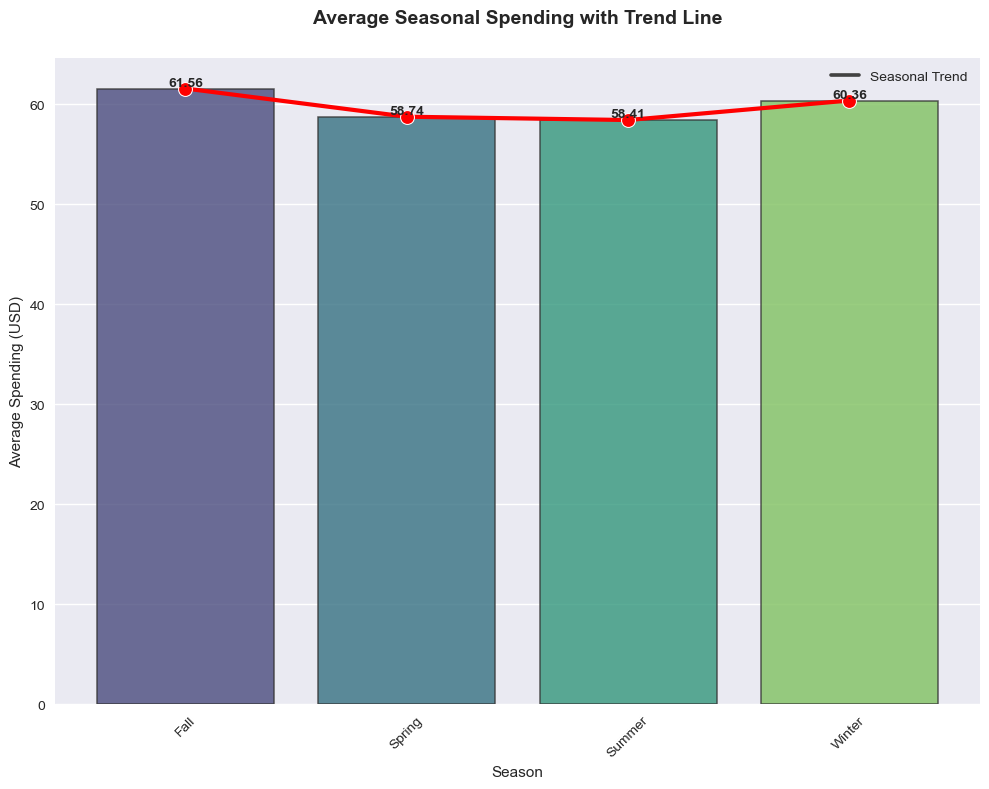

In [41]:
# Average Spending per Season (pivot data)
pivot = pd.pivot_table(data=df, values='Purchase_Amount (USD)', index='Season', aggfunc='mean').reset_index()

plt.figure(figsize=(10,8))
ax = sns.barplot(data=pivot, x='Season', y='Purchase_Amount (USD)', 
                 palette='viridis', edgecolor='0.2', linewidth=1.1, alpha=0.8)

# Trend line (lineplot on same data)
sns.lineplot(data=pivot, x='Season', y='Purchase_Amount (USD)', 
             marker='o', linewidth=3, markersize=10, color='red', ax=ax)

plt.title('Average Seasonal Spending with Trend Line', fontsize=14, fontweight='bold', pad=25)
plt.xlabel('Season')
plt.ylabel('Average Spending (USD)')
plt.xticks(rotation=45)

# Data Labels 
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.legend(['Seasonal Trend'], loc='upper right')
plt.tight_layout()
plt.show()

## __Insights__
1. Fall is the peak spending season, with an average amount of $\$61.56$. Customers spend the most on average during the fall season.
2. The winter season performs well behind the fall season with a difference in average spent of $\$1.2$.
3. Spring ($\$58.74$) and Summer ($\$58.41$) are the weakest seasons where spending drops. So in essence spending drops in the warmer months, where the summer is the softest period.
4. Clear seasonal patterns indicate that cold and transitional months equal significantly higher average spending, whereas warm months lag, equal to the lowest average spending.

# __CONCLUSION__

This exploratory data analysis of fashion retail customer shopping  behaviour provides information on the most important business questions pertaining to the demographics or profiles of customers, purchasing habits, frequency of purchases, purchasing patterns, and underlying relationships in the dataset. Below is a summary of the answers to the business questions of interest.
1. __Who are the customers?__
The customer base is made of shoppers of diverse or mixed-age groups across different states, with a gender distribution that skews male. 
This is evident with about 68% of the shoppers being male and the average age being approximately 44 years, which is middle-aged. Subscriptions by customers are low (27%), with a majority (57%) showing low price sensitivity by avoiding discounts. Repeat buyers are common (average 25 prior purchases), indicating loyalty potential.

2. __What do they buy?__
The category of items mostly purchased includes clothing, footwear, and accessories. Clothing takes up 44.5% of all purchases, followed by accessories with 31.8% and footwear with 15.4%. Preferences also tilt towards medium sizes and neutral or diverse colours. Overall, customers were satisfied with their purchases, with an average rating of 3.75 out of 5, with footwear having the highest rate.

3. __When and how often do they buy?__
Purchases are made all year round, with the peak season being spring, when the volume of purchases is the highest, but the peak spending occurs in the fall season, with an average spent of $\$61.6$, followed by the winter season with an average of $\$60.4$, dropping in the summer with an average of $\$58.4$. The frequency of purchases is fairly balanced, with most purchases done quarterly.

4. __Are there spending patterns by gender, age, location, or category?__
Spending varies by gender, age group, location, and category. Females slightly outspend males with an average of $\$60.3$ as against $\$59.5$, with gender-specific category preferences where females prefer accessories and outerwear, and men prefer footwear. Age group spending patterns show a consistency across all the adult lifespan, with little dips in middle age and slight peaks at the youngest and oldest groups. Spending patterns by location are also fairly evenly distributed, with the state of Nevada spending more.

5. __What is the preferred mode of payment by customers?__
The preferences with respect to the mode of payment are evenly distributed, with PayPal emerging as slightly the most preferred, ahead of credit cards and Venmo.

6. __What relationships and trends can be derived from the data?__
Overall, the correlations between the numeric variables are weak, meaning the strength of the relationship is not strong, but key trends include negative links between discounts and spending, seasonal peaks in colder months, and consistent satisfaction.

# __RECOMMENDATION__
From the insights from the exploratory data analysis, the following recommendations could be considered to boost customer retention, revenue, and overall operational efficiency.
1. Marketing should be done to fill some demographic gaps. For instance, females should be a marketing target to increase their subscription in the customer base. For age, younger customers between 18 and 25 should be targeted with social media campaigns, as well as older customers between the ages of 66 and 70, with loyalty rewards to build repeat purchase tendencies.

2. Products and inventory strategy should be enhanced by giving priority to clothing and footwear in the assortment. On average, outerwear had the least spending, and that could be addressed by combining its sales with in-demand products or doing seasonal promotions. Assort colours and sizes to match preferences.

3. Leverage seasonal trends by allocating more budget to inventories and marketing during the fall and winter seasons, as those are the periods when most sales are made. Flash sales or limited-time bundles should be introduced during the spring and summer months to keep sales frequent without relying too heavily on discounts.

4. Improve payment and experience by encouraging the usage of PayPal and credit cards for smooth online shopping while keeping a variety of payment methods. Also, subscription mechanisms should be incorporated to increase the number of return visits by customers

5. Further analysis and actions could be carried out, for instance, the creation of predictive models for churn or risk based on low prior purchases, A/B test recommendations for improving average order value, and retention. Market basket analysis could also be used to identify the purchasing patterns of customers by having a fair knowledge of the combination of items regularly bought to meet their demands and to maximize revenue. Customer segmentation could also be carried out for targeted engagement strategies. 








